<a href="https://colab.research.google.com/github/BiancaBb01/PMP-2024/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subiectul 1

In [13]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np

fisier1 = "/content/sample_data/date_alegeri_turul2.csv"

data = pd.read_csv(fisier1)
print("Coloane disponibile în fișier:", data.columns)

with pm.Model() as model:
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta_varsta = pm.Normal('beta_varsta', mu=0, sigma=10)
    beta_sex = pm.Normal('beta_sex', mu=0, sigma=10)
    beta_educatie = pm.Normal('beta_educatie', mu=0, sigma=10)
    beta_venit = pm.Normal('beta_venit', mu=0, sigma=10)
    logit_p = (intercept +
               beta_varsta * data['varsta'] +
               beta_sex * data.get('sex', 0) +
               beta_educatie * data['educatie'] +
               beta_venit * data['venit'])
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))
    y = pm.Bernoulli('y', p=p, observed=data['vot'])
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

az.plot_trace(trace);
az.summary(trace, hdi_prob=0.95)

waic = az.waic(trace)
loo = az.loo(trace)
print(waic)
print(loo)



Coloane disponibile în fișier: Index(['Varsta', 'Sex', 'Educatie', 'Venit', 'Vot'], dtype='object')


KeyError: "Coloana 'varsta' nu există în fișier. Verifică datele CSV."

Subiectul 2


Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Mu query: [[ 5.84199396  3.05653953  3.75241159  1.20070343]
 [-0.0385903   0.06818082  0.04272473 -0.12812957]
 [ 0.12395701  0.08258726  0.02233933  0.17552918]]
Sigma query: [[0.83330267 0.43900918 1.76686198 0.76559105]
 [1.01652082 0.97961671 1.0038551  1.00311076]
 [1.01012748 1.00448343 0.97343068 1.00123177]]
Pi query: [0.98672963 0.00665283 0.00661755]


/usr/local/lib/python3.11/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.11/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.11/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"mu[0, 0]",5.842,0.067,5.713,5.973,0.001,0.001,5889.0,2884.0,1.0
"mu[0, 1]",3.057,0.036,2.988,3.128,0.000,0.000,6092.0,2802.0,1.0
"mu[0, 2]",3.752,0.146,3.470,4.044,0.002,0.002,4374.0,2962.0,1.0
"mu[0, 3]",1.201,0.062,1.081,1.325,0.001,0.001,5281.0,2840.0,1.0
"mu[1, 0]",-0.039,9.781,-18.336,19.867,0.153,0.150,4083.0,3206.0,1.0
...,...,...,...,...,...,...,...,...,...
z[145],0.000,0.000,0.000,0.000,0.000,0.000,4000.0,4000.0,NaN
z[146],0.000,0.000,0.000,0.000,0.000,0.000,4000.0,4000.0,NaN
z[147],0.000,0.000,0.000,0.000,0.000,0.000,4000.0,4000.0,NaN
z[148],0.000,0.000,0.000,0.000,0.000,0.000,4000.0,4000.0,NaN


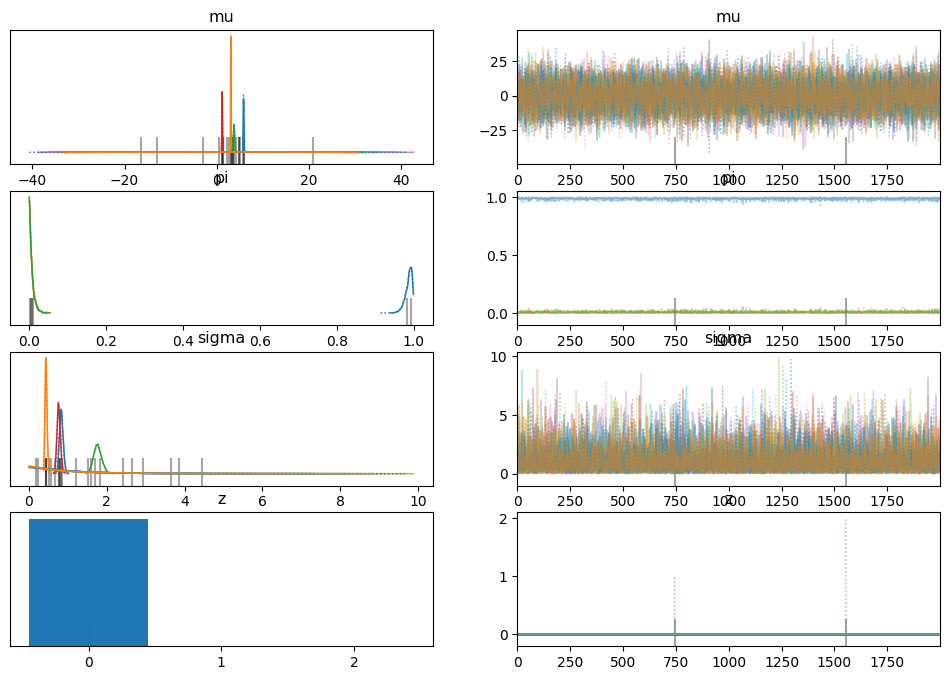

In [12]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np

fisier2 = "/content/sample_data/iris.csv"

df_iris = pd.read_csv(fisier2)
df_iris = df_iris.select_dtypes(include=[np.number]).dropna()
observed_data = df_iris.values.astype(float)

with pm.Model() as model_iris:
    mu = pm.Normal('mu', mu=0, sigma=10, shape=(3, df_iris.shape[1]))
    sigma = pm.Exponential('sigma', 1, shape=(3, df_iris.shape[1]))
    pi = pm.Dirichlet('pi', a=np.array([1, 1, 1]))
    z = pm.Categorical('z', p=pi, shape=df_iris.shape[0])
    likelihood = pm.Normal('x', mu=mu[z], sigma=sigma[z], observed=observed_data)
    trace_iris = pm.sample(2000, tune=1000, return_inferencedata=True)

mu_query = trace_iris.posterior['mu'].mean(dim=["chain", "draw"])
sigma_query = trace_iris.posterior['sigma'].mean(dim=["chain", "draw"])
pi_query = trace_iris.posterior['pi'].mean(dim=["chain", "draw"])

print("Mu query:", mu_query.values)
print("Sigma query:", sigma_query.values)
print("Pi query:", pi_query.values)

az.plot_trace(trace_iris)
az.summary(trace_iris, hdi_prob=0.95)
